# Problem Statement
- **DOMAIN**: Automobile
- **CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
- **DATA DESCRIPTION**:
    - cylinders: multi-valued discrete 
    - acceleration: continuous
    - displacement: continuous 
    - model year: multi-valued discrete
    - horsepower: continuous 
    - origin: multi-valued discrete
    - weight: continuous 
    - car name: string (unique for each instance)
    - mpg: continuous
- **PROJECT OBJECTIVE**: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [1]:
# Importing Key Libraries

import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

# 
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

In [2]:
df_car=pd.read_csv('Car name.csv')

In [3]:
df_car.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
df_car.shape

(398, 1)

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [6]:
df_attr=pd.read_json('Car-Attributes.json')

In [7]:
df_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.00,8,307.00,130,3504,12.00,70,1
1,15.00,8,350.00,165,3693,11.50,70,1
2,18.00,8,318.00,150,3436,11.00,70,1
3,16.00,8,304.00,150,3433,12.00,70,1
4,17.00,8,302.00,140,3449,10.50,70,1


In [8]:
df_attr.shape

(398, 8)

In [9]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


**There are no common columns, so we'll need to concatenate the dataframes by column**

In [10]:
df=pd.concat([df_car,df_attr],axis=1)

In [11]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.00,8,307.00,130,3504,12.00,70,1
1,buick skylark 320,15.00,8,350.00,165,3693,11.50,70,1
2,plymouth satellite,18.00,8,318.00,150,3436,11.00,70,1
3,amc rebel sst,16.00,8,304.00,150,3433,12.00,70,1
4,ford torino,17.00,8,302.00,140,3449,10.50,70,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**hp is a numerical data but has a dtype of 'object'. First we'll convert it to numerical format**

In [13]:
#We'll first find out all the non-numeric values in the columns
for col in df.columns:
    non_numeric = []
    if col != 'car_name':
        for value in df[col]:
            if not isinstance(value, (int, float)):
                non_numeric.append(value)
        print('Non-Numeric values in column \'{0}\' are: {1}'.format(col,non_numeric))

Non-Numeric values in column 'mpg' are: []
Non-Numeric values in column 'cyl' are: []
Non-Numeric values in column 'disp' are: []
Non-Numeric values in column 'hp' are: ['?', '?', '?', '?', '?', '?']
Non-Numeric values in column 'wt' are: []
Non-Numeric values in column 'acc' are: []
Non-Numeric values in column 'yr' are: []
Non-Numeric values in column 'origin' are: []


**We need to remove the '?' character from the hp column to print its 5 point summary**

In [14]:
df.hp=df.hp.replace('?',np.nan)

In [15]:
df['hp']=pd.to_numeric(df['hp'])

In [16]:
#Printing the five point summary of all the numerical columns of the dataframe
for idx, column in enumerate(df.columns):
    if column != 'car_name':    
        print('\033[1mThe Five Point Summary of \'{0}\' column: \033[0m'.format(column))
        print('Minimum Value of {0} column = {1}'.format(column,df[column].min()))
        print('Q1 Value of {0} column = {1}'.format(column,df[column].quantile(0.25)))
        print('Median Value of {0} column = {1}'.format(column,df[column].quantile(0.5)))
        print('Q3 Value of {0} column = {1}'.format(column,df[column].quantile(0.75)))
        print('Maximum Value of {0} column = {1}'.format(column,df[column].max()))
        print('\nIn Addition to these, the mean and standard devition for the feature are as below:')
        print('Mean Value of {0} column = {1}'.format(column,df[column].mean()))
        print('Standard Deviation Value of {0} column = {1}'.format(column,df[column].std()))
        print('\n')

The Five Point Summary of 'mpg' column: 
Minimum Value of mpg column = 9.0
Q1 Value of mpg column = 17.5
Median Value of mpg column = 23.0
Q3 Value of mpg column = 29.0
Maximum Value of mpg column = 46.6

In Addition to these, the mean and standard devition for the feature are as below:
Mean Value of mpg column = 23.514572864321607
Standard Deviation Value of mpg column = 7.815984312565782


The Five Point Summary of 'cyl' column: 
Minimum Value of cyl column = 3
Q1 Value of cyl column = 4.0
Median Value of cyl column = 4.0
Q3 Value of cyl column = 8.0
Maximum Value of cyl column = 8

In Addition to these, the mean and standard devition for the feature are as below:
Mean Value of cyl column = 5.454773869346734
Standard Deviation Value of cyl column = 1.7010042445332094


The Five Point Summary of 'disp' column: 
Minimum Value of disp column = 68.0
Q1 Value of disp column = 104.25
Median Value of disp column = 148.5
Q3 Value of disp column = 262.0
Maximum Value of disp column = 455.0

I

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        392 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


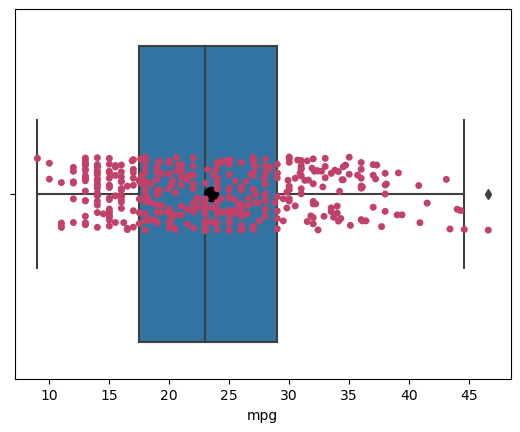

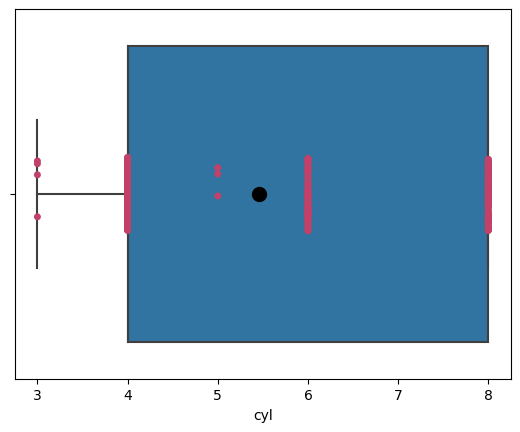

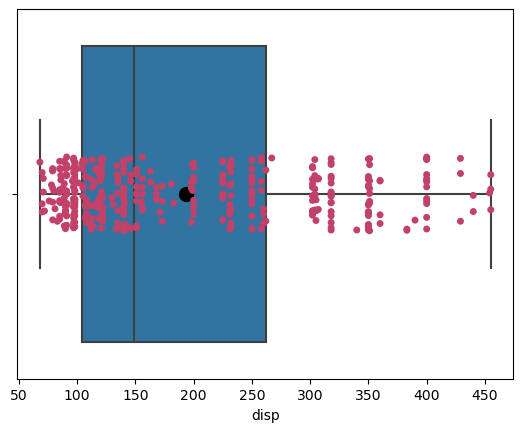

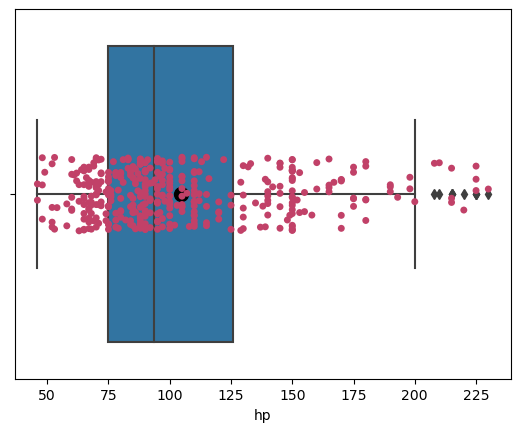

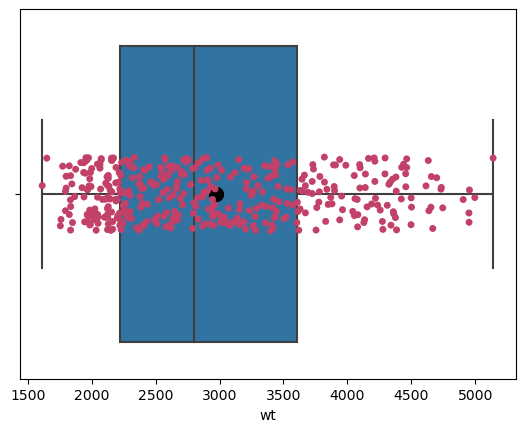

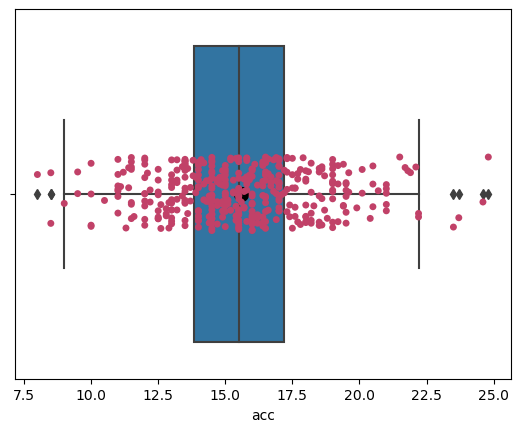

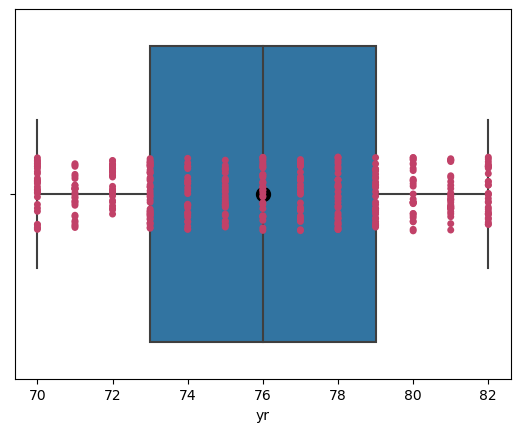

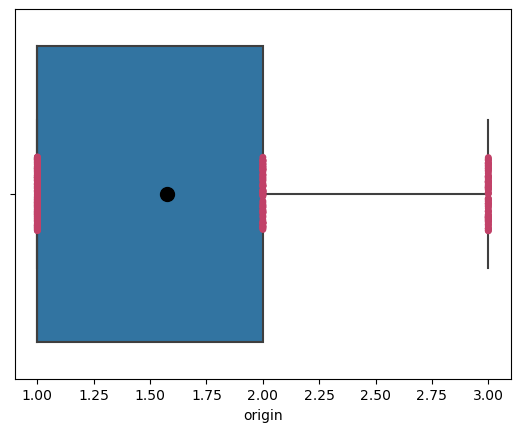

In [18]:
for col in df.iloc[:,1:].columns:
    _=sns.boxplot(data=df.iloc[:,1:],
            x=col,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"});
    _=sns.stripplot(data=df.iloc[:,1:],x=col,palette = 'flare');
    plt.show()

In [19]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [20]:
for col in df.columns:
    null_col=df[col].isna().sum()
    print('The number of missing values in Column \'{0}\' is = {1} and the percentage is = {2:.2f}%'.format(col,null_col,null_col*100/df.shape[0]))

The number of missing values in Column 'car_name' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'mpg' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'cyl' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'disp' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'hp' is = 6 and the percentage is = 1.51%
The number of missing values in Column 'wt' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'acc' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'yr' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'origin' is = 0 and the percentage is = 0.00%


**We see there are 6 missing values in 'hp' column. We'll impute these missing values with the median of the column**

In [21]:
df['hp'].fillna(df.hp.median(), inplace=True)

**After Imputation**

In [22]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [23]:
for col in df.columns:
    null_col=df[col].isna().sum()
    print('The number of missing values in Column \'{0}\' is = {1} and the percentage is = {2:.2f}%'.format(col,null_col,null_col*100/df.shape[0]))

The number of missing values in Column 'car_name' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'mpg' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'cyl' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'disp' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'hp' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'wt' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'acc' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'yr' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'origin' is = 0 and the percentage is = 0.00%


**Now there are no missing values in any column**

In [24]:
df.duplicated().sum()

0

**There are no duplicated rows in the dataset and hence no imputation is required**

<Figure size 2000x2000 with 0 Axes>

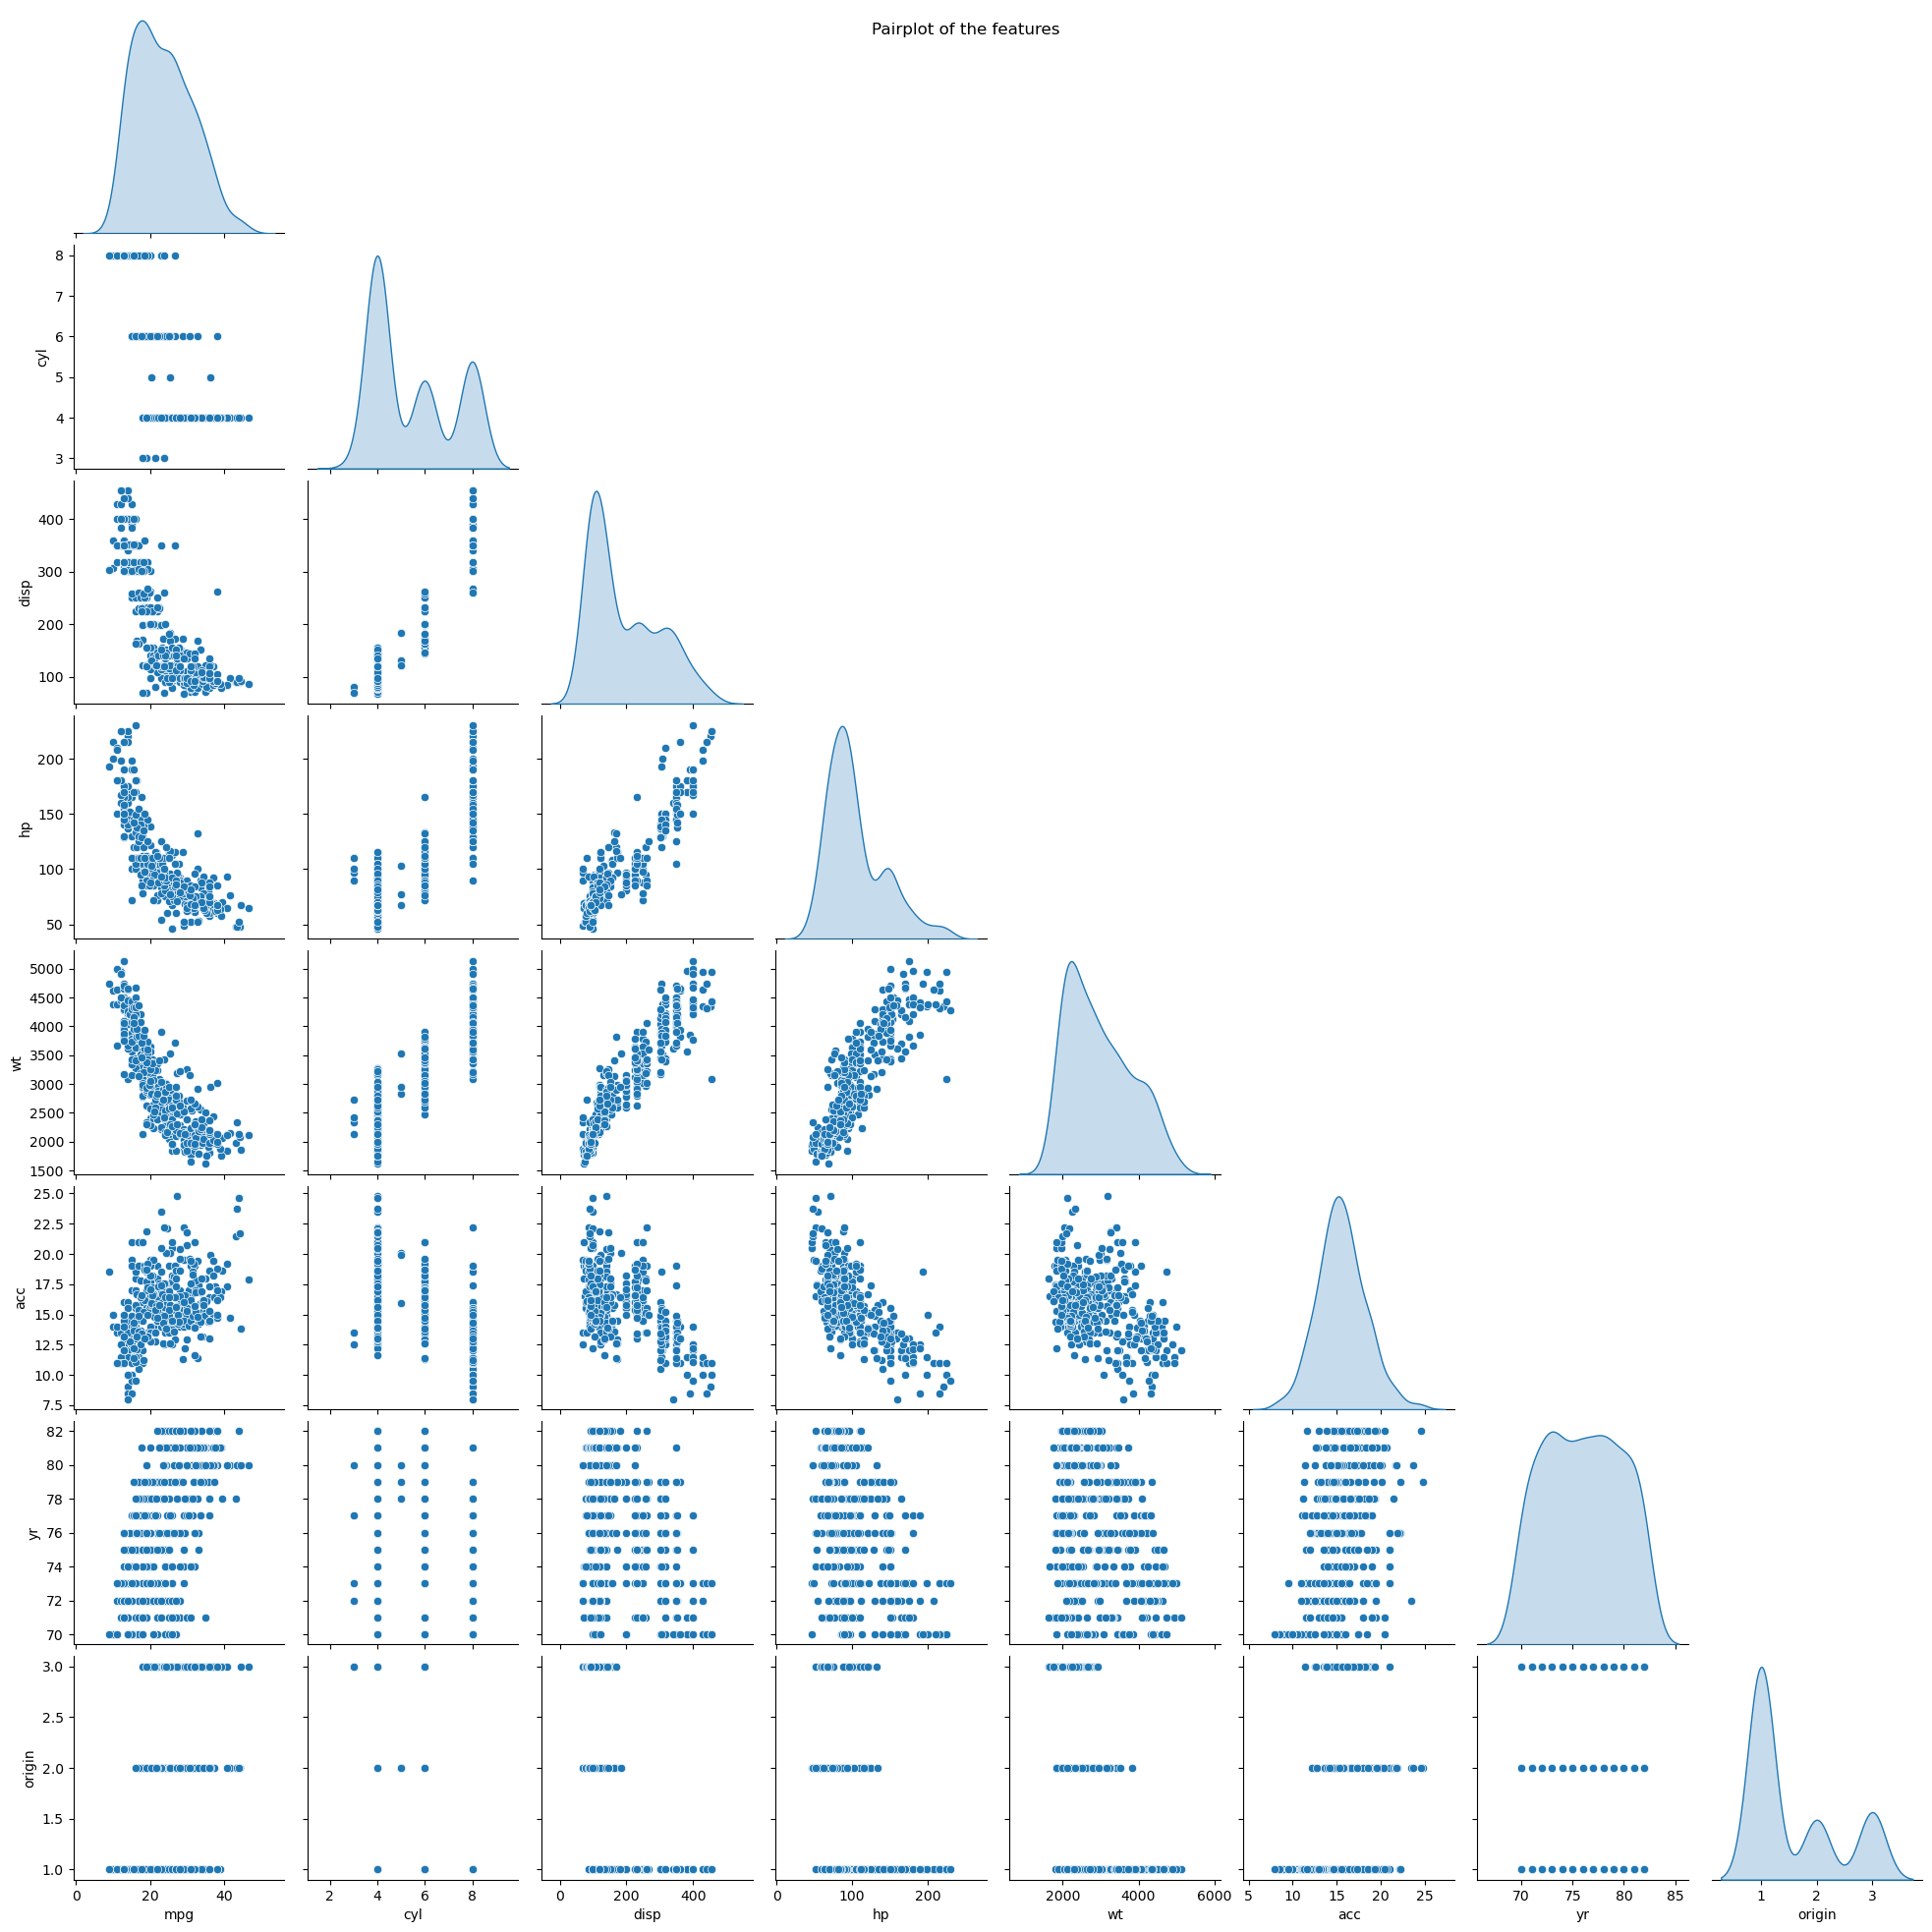

In [25]:
col_list=df.columns[1:]
plt.figure(figsize=(20,20));
pp=sns.pairplot(data=df,vars=col_list,corner=True,diag_kind='kde');
pp.fig.suptitle('Pairplot of the features')
plt.show();

**Based on the pairplot we can observe the following:**

- We see 3 crests on multiple features
- There seem to be a minimum of 3 clusters possible among the cars
- There can be more clusters possible, and the exact number needs to be determined with the elbow method

- Further on correlations:
    - There is negative correlation between the following pairs:
        - mpg and wt
        - mpg and hp
        - mpg and disp
        - mpg and cyl
        - hp and acc
        - disp and acc

    - There is positive correlation between the following pairs:
        - disp and hp
        - disp and wt
        - hp and wt
        - cyl and disp
        - cyl and hp
        - cyl and wt


<Axes: >

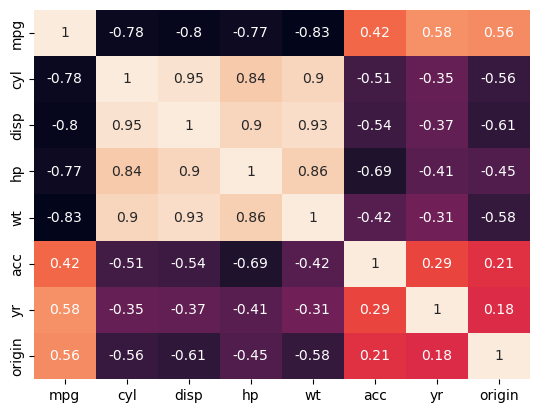

In [26]:
sns.heatmap(data=df.corr(),annot=True,cbar=False)

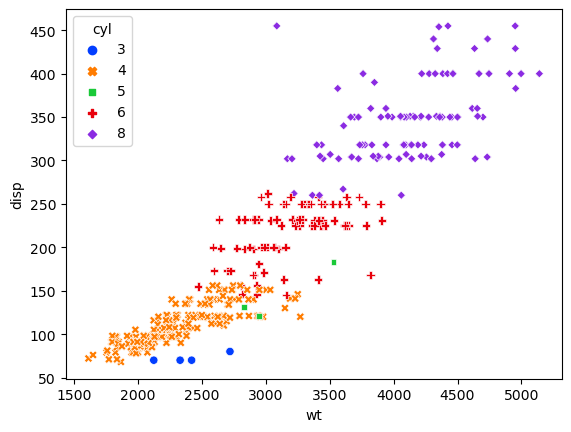

In [27]:
sns.scatterplot(data=df,x='wt',y='disp',hue='cyl',style='cyl',palette='bright');

**Based on the scatterplot we can observe the following:**
- disp and wt form two axes, with cyl forming the third dimension
- Based on these three dimensions, the cars seem to be distributed primarily in three clusters
    - At the lower end of wt and disp we see one cluster primarily consisting of 4 cyl cars
    - There's another cluster in the mid-range primarily consisting of 6 cyl cars
    - At the higher end of wt and disp there's another cluster primarily consisting of 8 cyl cars
- There is high positive correlation between the wt and cyl features

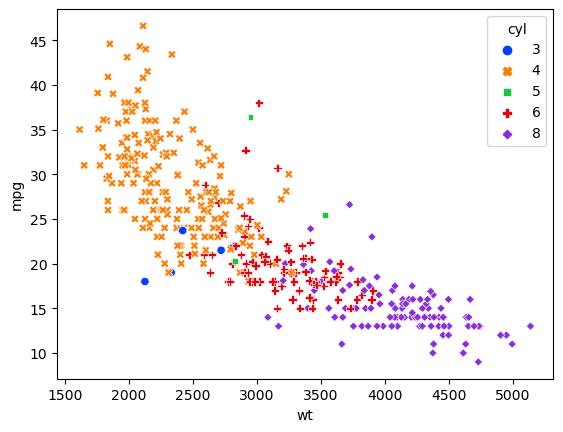

In [28]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='cyl',style='cyl',palette='bright');

**Based on the scatterplot we can observe the following:**
- mpg and wt form two axes, with cyl forming the third dimension
- Based on these three dimensions, the cars seem to be distributed primarily in three clusters
    - At the lower end of wt there are 4 cyl cars with high mpg
    - In the mid-range of weight and mpg there's a cluster of cars with 4, 5 and 6 cyl
    - At the higher end of wt there's a cluster of primarily 8 cyl cars with low mpg
- There is negative correlation between the wt and cyl features

In [29]:
for col in df.columns:
    non_numeric = []
    if col != 'car_name':
        for value in df[col]:
            if not isinstance(value, (int, float)):
                non_numeric.append(value)
        print('Unexpected values in column \'{0}\' are: {1}'.format(col,non_numeric))

Unexpected values in column 'mpg' are: []
Unexpected values in column 'cyl' are: []
Unexpected values in column 'disp' are: []
Unexpected values in column 'hp' are: []
Unexpected values in column 'wt' are: []
Unexpected values in column 'acc' are: []
Unexpected values in column 'yr' are: []
Unexpected values in column 'origin' are: []


**We'll drop the non-numeric and categorical variables 'car_name and origin**

In [30]:
dfAttr=df.iloc[:,1:8]
dfAttr.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.00,8,307.00,130.00,3504,12.00,70
1,15.00,8,350.00,165.00,3693,11.50,70
2,18.00,8,318.00,150.00,3436,11.00,70
3,16.00,8,304.00,150.00,3433,12.00,70
4,17.00,8,302.00,140.00,3449,10.50,70


**Now we'll scale the columns using zscore scaler**

In [31]:
from scipy.stats import zscore
dfScaled=dfAttr.apply(zscore)
dfScaled.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.71,1.50,1.09,0.67,0.63,-1.30,-1.63
1,-1.09,1.50,1.50,1.59,0.85,-1.48,-1.63
2,-0.71,1.50,1.20,1.20,0.55,-1.66,-1.63
3,-0.96,1.50,1.06,1.20,0.55,-1.30,-1.63
4,-0.83,1.50,1.04,0.94,0.57,-1.84,-1.63


**We see there are a few outliers in the dataset, but we'll not apply outlier treatment as these maybe important to form the clusters. Outlier treatment if required should be confirmed by domain experts**

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=np.arange(2,11)
labels=[]
meanDistortions=[]
wss=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=9)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, metric='euclidean'), axis=1)) / dfScaled.shape[0])
    labels.append(model.labels_)
    wss.append(model.inertia_)



KMeans(n_clusters=2, random_state=9)

KMeans(n_clusters=3, random_state=9)

KMeans(n_clusters=4, random_state=9)

KMeans(n_clusters=5, random_state=9)

KMeans(n_clusters=6, random_state=9)

KMeans(n_clusters=7, random_state=9)

KMeans(random_state=9)

KMeans(n_clusters=9, random_state=9)

KMeans(n_clusters=10, random_state=9)

**Plot for Mean Distortions**

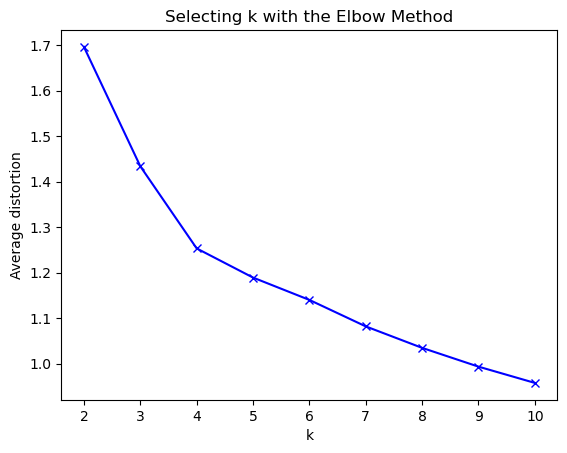

In [33]:
_=plt.plot(clusters, meanDistortions, 'bx-');
_=plt.xlabel('k');
_=plt.ylabel('Average distortion');
_=plt.title('Selecting k with the Elbow Method');


**Plot for Silhouette scores**

Silhouette score for 2 clusters is: 0.4823594610391611
Silhouette score for 3 clusters is: 0.35314791198988205
Silhouette score for 4 clusters is: 0.3480510627499992
Silhouette score for 5 clusters is: 0.3172394306969918
Silhouette score for 6 clusters is: 0.2743907543364381
Silhouette score for 7 clusters is: 0.2833706835407732
Silhouette score for 8 clusters is: 0.27050688975988174
Silhouette score for 9 clusters is: 0.26685314805759697
Silhouette score for 10 clusters is: 0.2620849326591067


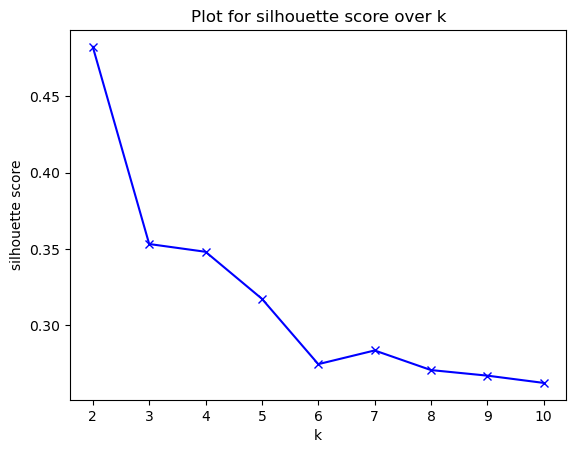

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score_list=[]
for i in np.arange(0,9):
    silhouette_score_list.append(silhouette_score(dfScaled,labels[i]))
    print('Silhouette score for {0} clusters is: {1}'.format(i+2,silhouette_score(dfScaled,labels[i])))
    
plt.plot(clusters, silhouette_score_list, 'bx-');
plt.xlabel('k');
plt.ylabel('silhouette score');
plt.title('Plot for silhouette score over k');

**Plot for WSS**

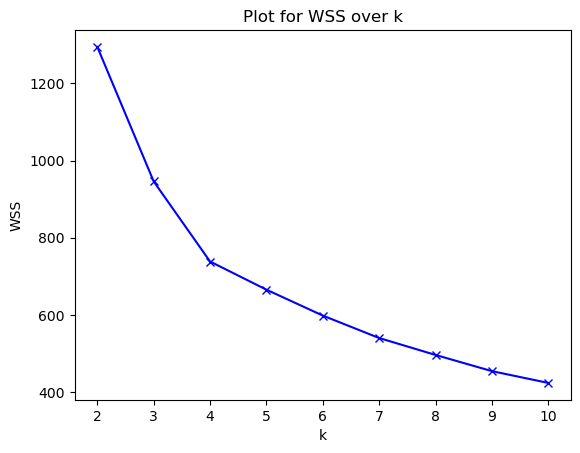

In [35]:
plt.plot(clusters, wss, 'bx-');
plt.xlabel('k');
plt.ylabel('WSS');
plt.title('Plot for WSS over k');

**Plot for Mean Distortion**

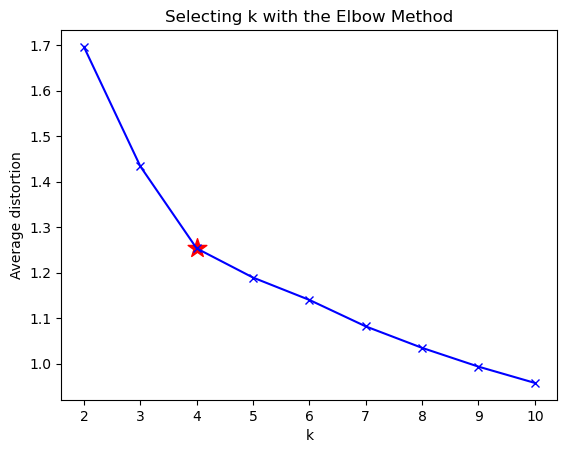

In [36]:
_=plt.plot(clusters, meanDistortions, 'bx-');
_=plt.scatter(clusters[2], meanDistortions[2], color='red', marker='*', s=200, label='Marked Point')
_=plt.xlabel('k');
_=plt.ylabel('Average distortion');
_=plt.title('Selecting k with the Elbow Method');

**Plot for Silhouette Score**

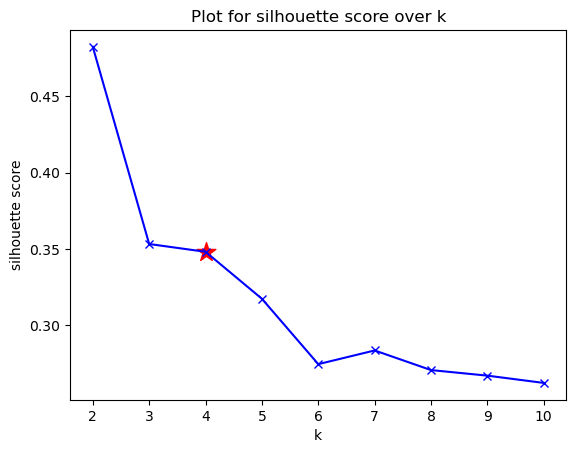

In [37]:
plt.plot(clusters, silhouette_score_list, 'bx-');
_=plt.scatter(clusters[2], silhouette_score_list[2], color='red', marker='*', s=200, label='Marked Point')
plt.xlabel('k');
plt.ylabel('silhouette score');
plt.title('Plot for silhouette score over k');

**Plot for WSS**

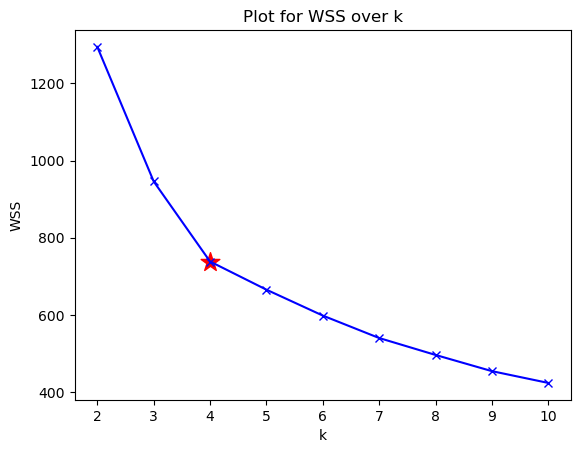

In [38]:
plt.plot(clusters, wss, 'bx-');
_=plt.scatter(clusters[2], wss[2], color='red', marker='*', s=200, label='Marked Point')
plt.xlabel('k');
plt.ylabel('WSS');
plt.title('Plot for WSS over k');

**Based on the mean distortion, silhouette score and WSS plots:**
- k=4 seems to be the elbow point.
- The mean distortion doesnt reduce highly beyond 4 clusters
- The WSS also doesnt reduce highly beyond 4 clusters
- The silhouette score also falls sharply after 4 clusters
- Based on above observations 4 clusters seem to be appropriate for the current list of cars

In [39]:
model_4=KMeans(n_clusters=4,random_state=9)
model_4.fit(dfScaled)
prediction_4=model_4.predict(dfScaled)
meanDistortions.append(sum(np.min(cdist(dfScaled, model_4.cluster_centers_, metric='euclidean'), axis=1)) / dfScaled.shape[0])
print('Within cluster sum of squares with 4 clusters is: ',model_4.inertia_)
print('Silhouette coefficient with 4 clusters is: ',silhouette_score(dfScaled,model_4.labels_))

KMeans(n_clusters=4, random_state=9)

Within cluster sum of squares with 4 clusters is:  738.3985963269442
Silhouette coefficient with 4 clusters is:  0.3480510627499992


In [40]:
model_4.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 9,
 'tol': 0.0001,
 'verbose': 0}

In [41]:
df_Cluster=df.copy(deep=True)
df_Cluster_Scaled=dfScaled.copy(deep=True)
df_Cluster['Cluster']=prediction_4
df_Cluster_Scaled['Cluster']=prediction_4
df_Cluster.head(20)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Cluster
0,chevrolet chevelle malibu,18.00,8,307.00,130.00,3504,12.00,70,1,1
1,buick skylark 320,15.00,8,350.00,165.00,3693,11.50,70,1,1
2,plymouth satellite,18.00,8,318.00,150.00,3436,11.00,70,1,1
3,amc rebel sst,16.00,8,304.00,150.00,3433,12.00,70,1,1
4,ford torino,17.00,8,302.00,140.00,3449,10.50,70,1,1
5,ford galaxie 500,15.00,8,429.00,198.00,4341,10.00,70,1,1
6,chevrolet impala,14.00,8,454.00,220.00,4354,9.00,70,1,1
7,plymouth fury iii,14.00,8,440.00,215.00,4312,8.50,70,1,1
8,pontiac catalina,14.00,8,455.00,225.00,4425,10.00,70,1,1
9,amc ambassador dpl,15.00,8,390.00,190.00,3850,8.50,70,1,1


In [42]:
df_Cluster.groupby(['Cluster']).mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Cluster,,,,,,,,
0,25.17,3.99,109.29,82.95,2329.31,16.47,73.69,2.01
1,14.43,8.00,350.04,162.39,4157.98,12.58,73.47,1.00
2,32.80,4.05,112.02,75.98,2319.77,16.61,80.13,1.99
3,19.64,6.18,225.22,102.86,3256.10,16.38,76.13,1.16


array([[<Axes: title={'center': 'acc'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'hp'}, xlabel='[Cluster]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'yr'}, xlabel='[Cluster]'>, <Axes: >]],
      dtype=object)

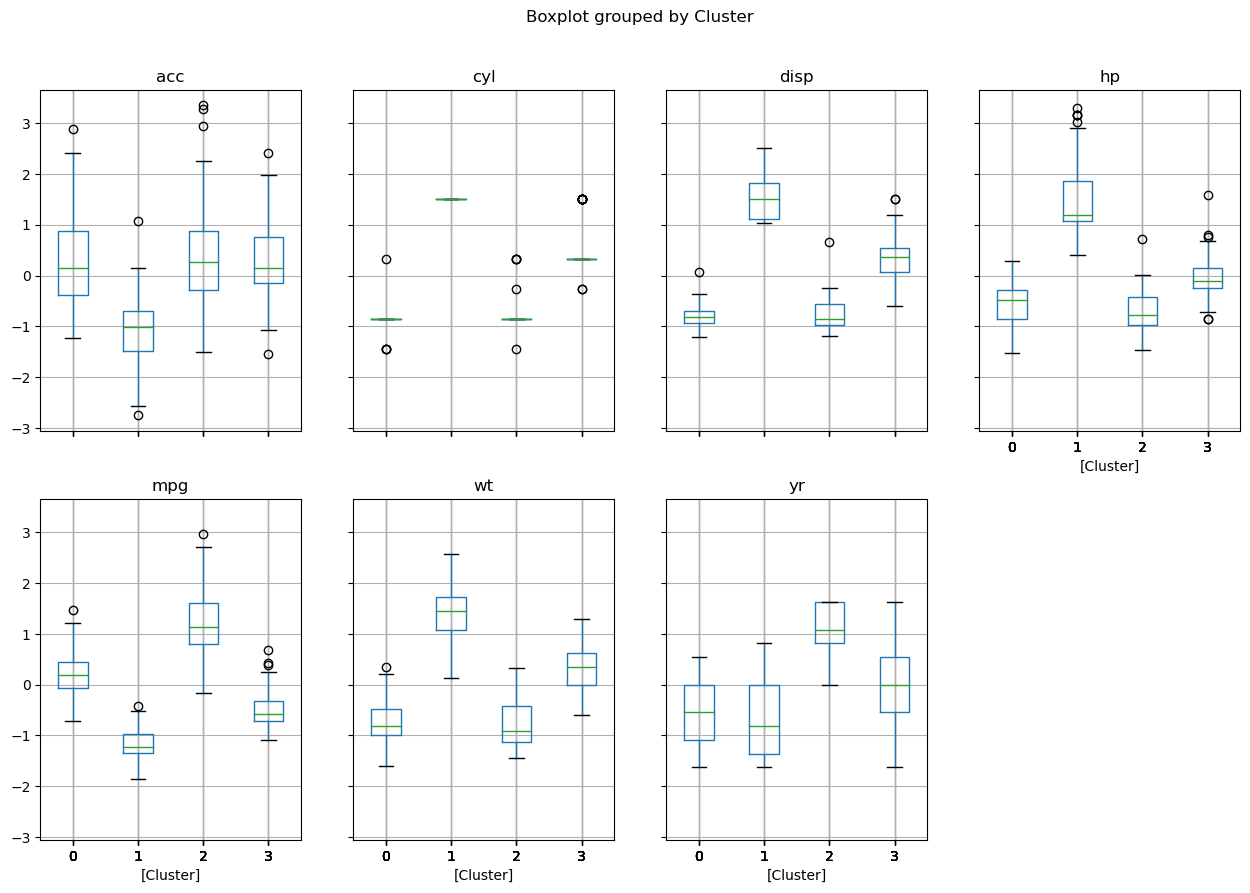

In [43]:
df_Cluster_Scaled.boxplot(by='Cluster', layout = (2,4),figsize=(15,10))

**Pairplot for the features distinguished by Clusters**

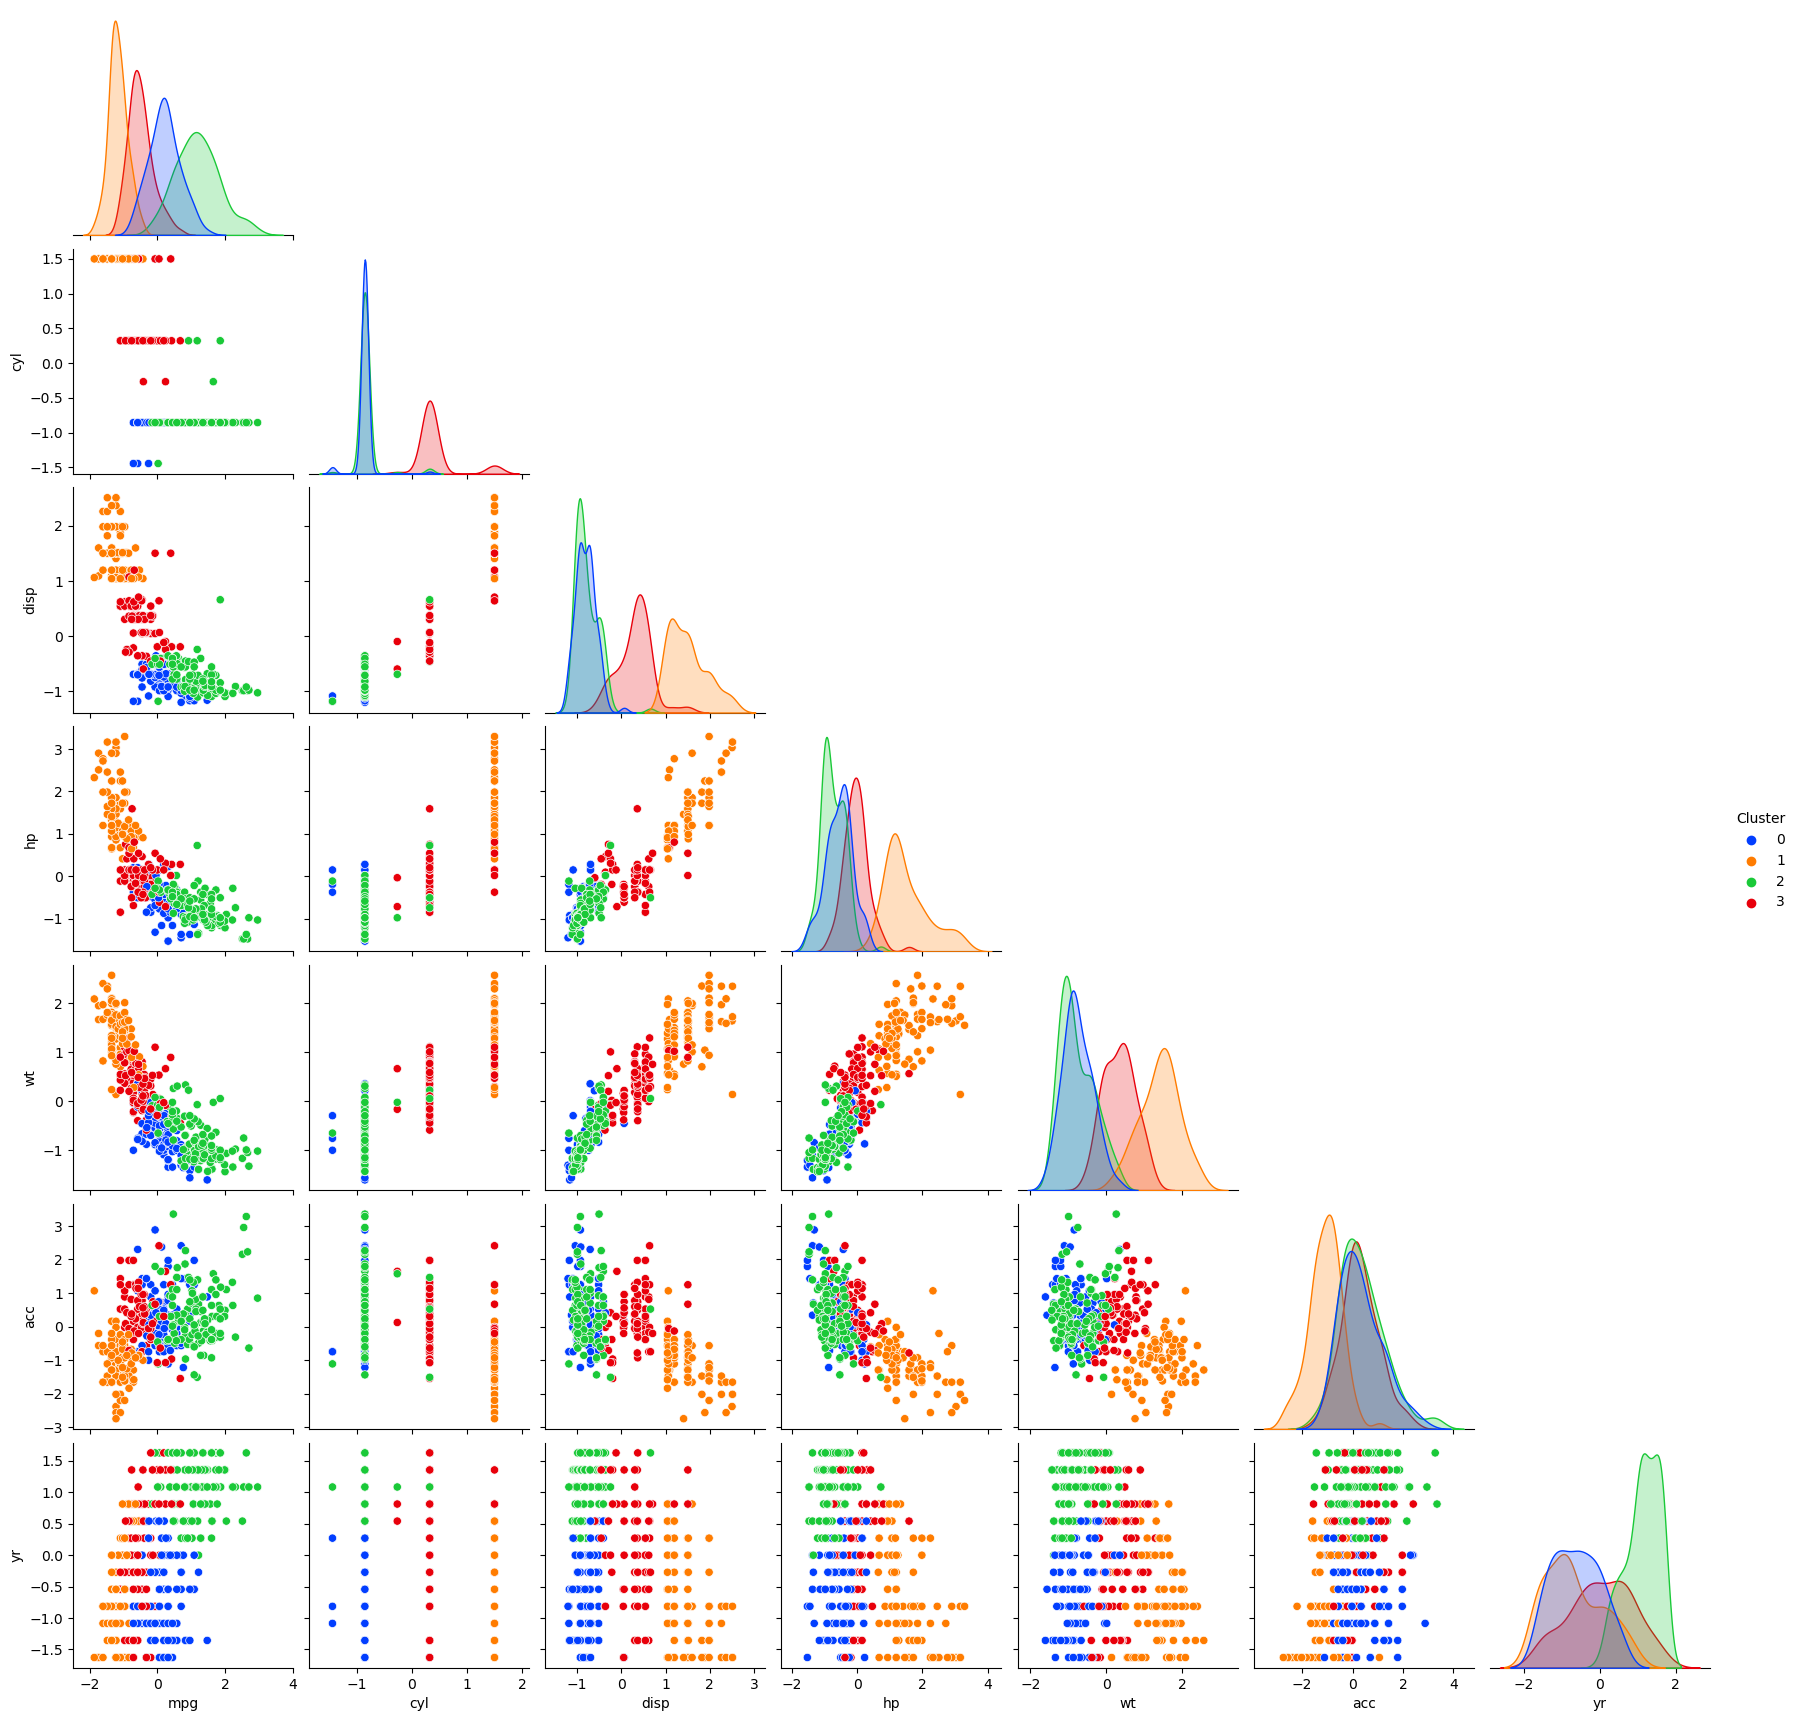

In [44]:
sns.pairplot(df_Cluster_Scaled,corner=True,diag_kind='kde',hue='Cluster',palette='bright')

**KDEplot for the 'mpg' features distinguished by Clusters**

<Axes: xlabel='mpg', ylabel='Density'>

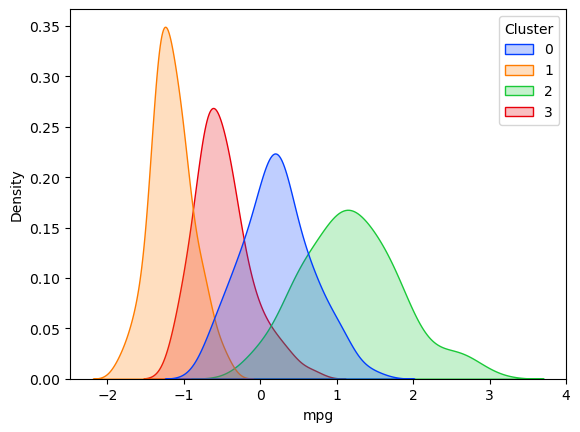

In [45]:
sns.kdeplot(data=df_Cluster_Scaled,x='mpg',hue='Cluster',palette='bright',fill=True)

**We can see that the clusters have distinct mpg figures. So the identfied clusters have been able to group the cars based on their mileage very well**

**Scatterplot for the features distinguished by Clusters**

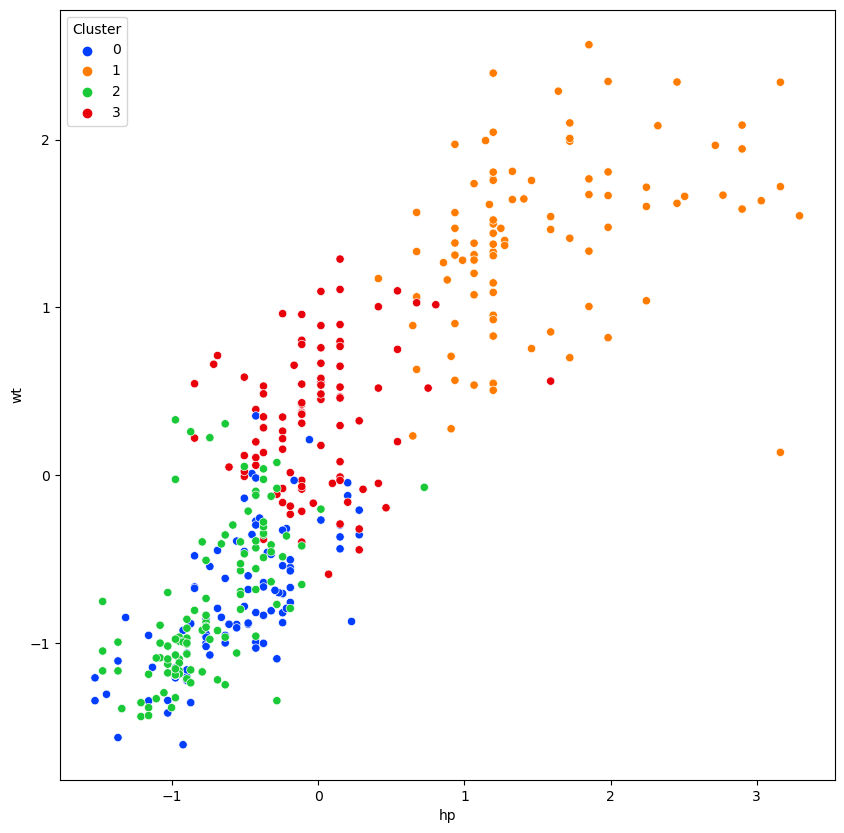

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_Cluster_Scaled,x='hp', y='wt', hue='Cluster',palette='bright');

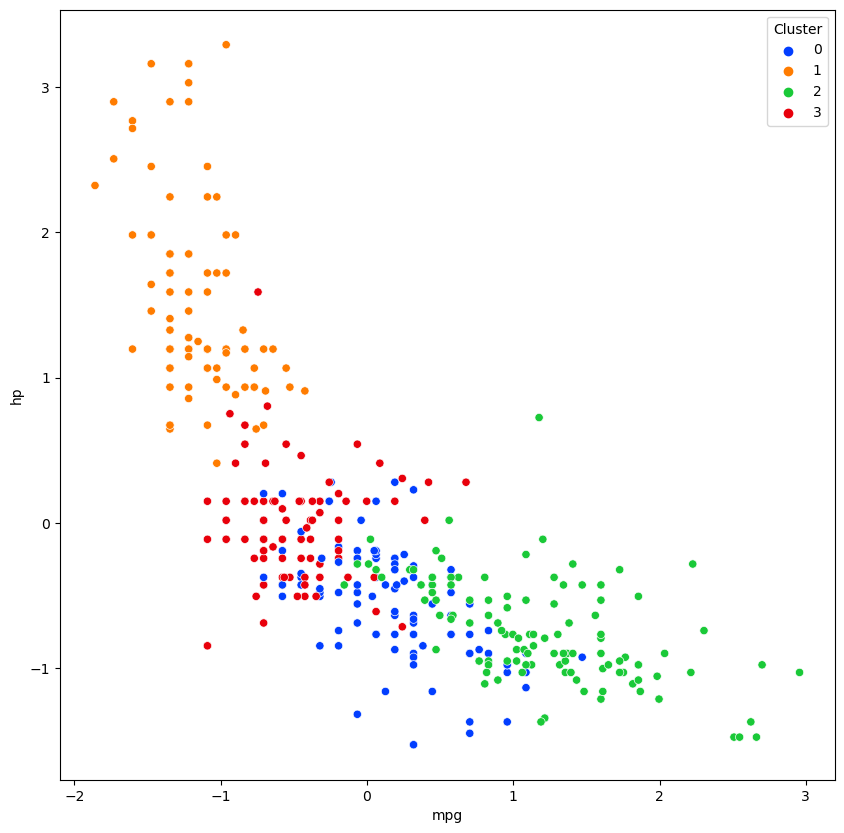

In [47]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_Cluster_Scaled,x='mpg', y='hp', hue='Cluster',palette='bright');

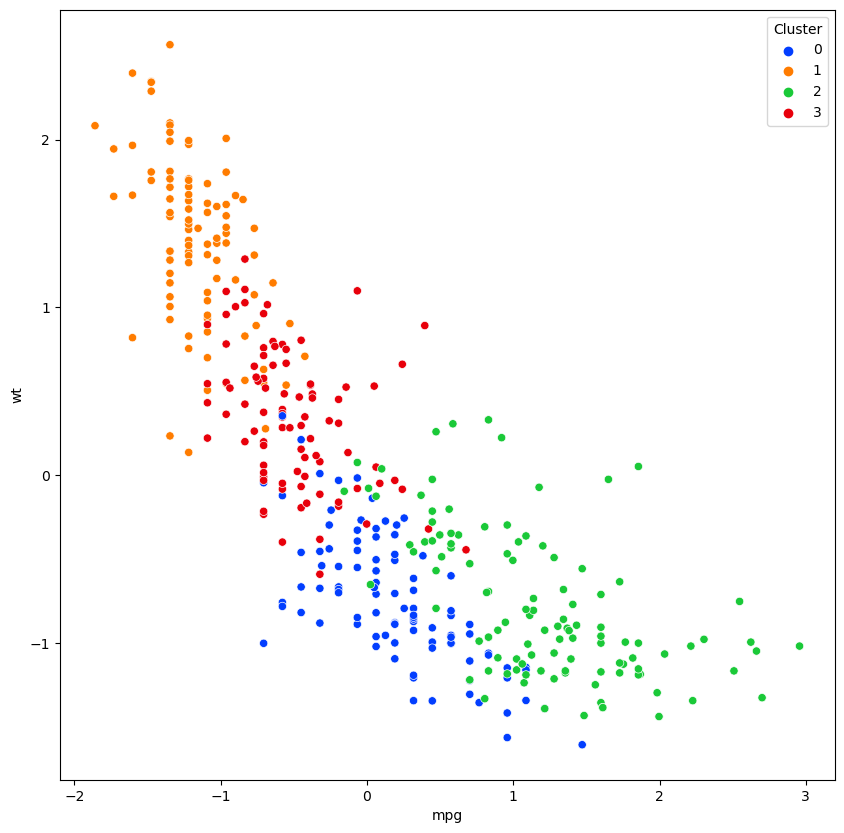

In [48]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_Cluster_Scaled,x='mpg', y='wt', hue='Cluster',palette='bright');

**Example 1: We'll create a new datapoint by selecting a random value between the min and max of each column, and use it to predict which cluster it belongs to**

In [49]:
import random
df_test=pd.DataFrame(columns=dfScaled.columns)
for col in dfScaled.columns:
    df_test.loc[0,[col]]=random.uniform(dfScaled[col].min(),dfScaled[col].max())
df_test.head()
print('The randomly created datapoint belongs to cluster: ',model_4.predict(df_test))                                          

,mpg,cyl,disp,hp,wt,acc,yr
0,2.10,1.03,1.07,1.01,-1.09,-2.41,-0.34


The randomly created datapoint belongs to cluster:  [3]


**Example 2: We'll create a new datapoint by randomly selecting one value from each of the columns, and use it to predict which cluster it belongs to**

In [50]:
df_test1=pd.DataFrame(columns=dfScaled.columns)
for col in dfScaled.columns:
    df_test1.loc[0,[col]]=random.choice(dfScaled[col])
df_test1.head()
print('The randomly created datapoint belongs to cluster: ',model_4.predict(df_test1))

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.90,-0.86,-0.93,0.02,-0.66,0.30,-0.00


The randomly created datapoint belongs to cluster:  [0]


**Example 3: Lets take a datapoint which has average values of the feature for each column, i.e. 0 values for each column on z-scale**

In [51]:
data = {'mpg': [0], 'cyl': [0], 'disp': [0], 'hp': [0], 'wt': [0], 'acc': [0], 'yr': [0]}
df_test2=pd.DataFrame(data)
df_test2.head()
print('The datapoint belongs to cluster: ',model_4.predict(df_test2))

,mpg,cyl,disp,hp,wt,acc,yr
0,0,0,0,0,0,0,0


The datapoint belongs to cluster:  [3]


### Summary

Based on the boxplot, kdeplot, scatterplot and pairplot we can observe the following about the 4 clusters formed using K-means clustering:
- The clusters of cars created have distinct mpg figures
- The K-means clustering algorithm has formed four cluster of cars having: low, mid-low, mid-high and high mpg figures
- Using the various parameters of the cars it is possible using the model created to predict what kind of mpg figures will the car have
- We cannot exactly predict the mog figure, like how it can be done in Supervised learning, but we can get an idea whether it will be a low or high mpg car
- This approach can help car buyers/sellers guess the approximate mpg figures and influence the buying/selling decisions